In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing, model_selection, metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mse
import warnings
warnings.filterwarnings('ignore')

In [43]:
basedata = pd.read_csv("baseball.csv")

basedata.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [44]:
basedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [45]:
basedata.shape

(30, 17)

In [46]:
basedata.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [47]:
print(basedata.isnull().sum(axis = 0).tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


From above we can see that our data is cleaned and does not contain any null values.

Visualizing the histogram for wins.

Text(0.5, 1.0, 'Histogram of Wins')

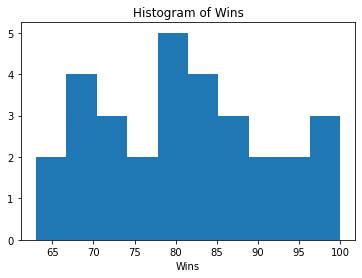

In [48]:
plt.hist(basedata['W'])
plt.xlabel('Wins')
plt.title('Histogram of Wins')

In [49]:
basedata['W'].mean()

80.96666666666667

array([[<AxesSubplot:title={'center':'W'}>,
        <AxesSubplot:title={'center':'R'}>,
        <AxesSubplot:title={'center':'AB'}>,
        <AxesSubplot:title={'center':'H'}>],
       [<AxesSubplot:title={'center':'2B'}>,
        <AxesSubplot:title={'center':'3B'}>,
        <AxesSubplot:title={'center':'HR'}>,
        <AxesSubplot:title={'center':'BB'}>],
       [<AxesSubplot:title={'center':'SO'}>,
        <AxesSubplot:title={'center':'SB'}>,
        <AxesSubplot:title={'center':'RA'}>,
        <AxesSubplot:title={'center':'ER'}>],
       [<AxesSubplot:title={'center':'ERA'}>,
        <AxesSubplot:title={'center':'CG'}>,
        <AxesSubplot:title={'center':'SHO'}>,
        <AxesSubplot:title={'center':'SV'}>],
       [<AxesSubplot:title={'center':'E'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

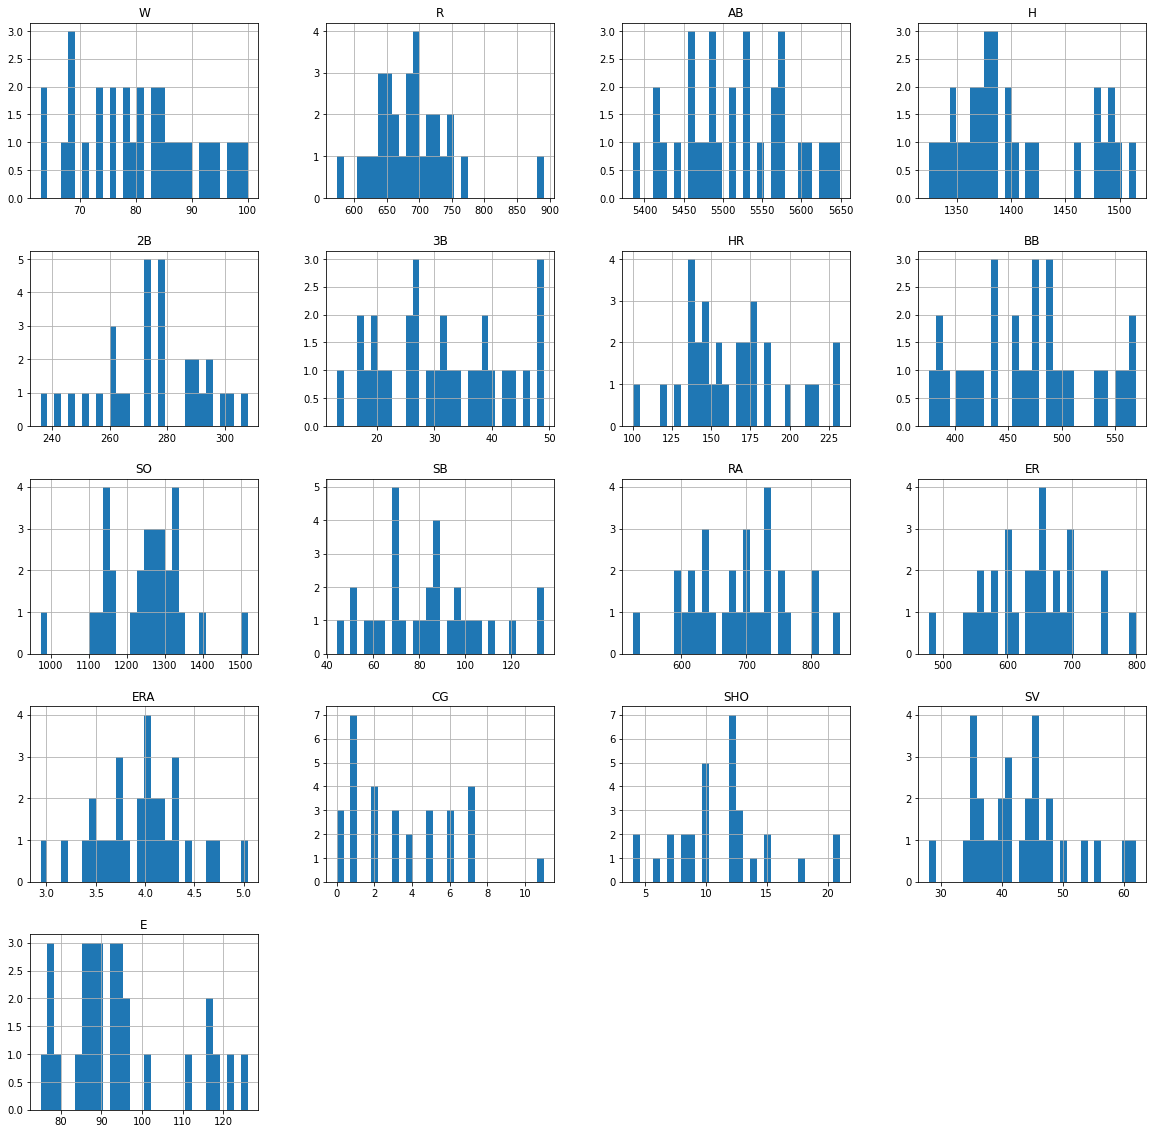

In [73]:
basedata.hist(figsize = (20,20) , grid = True, bins = 30)

In [51]:
basedata.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

[]

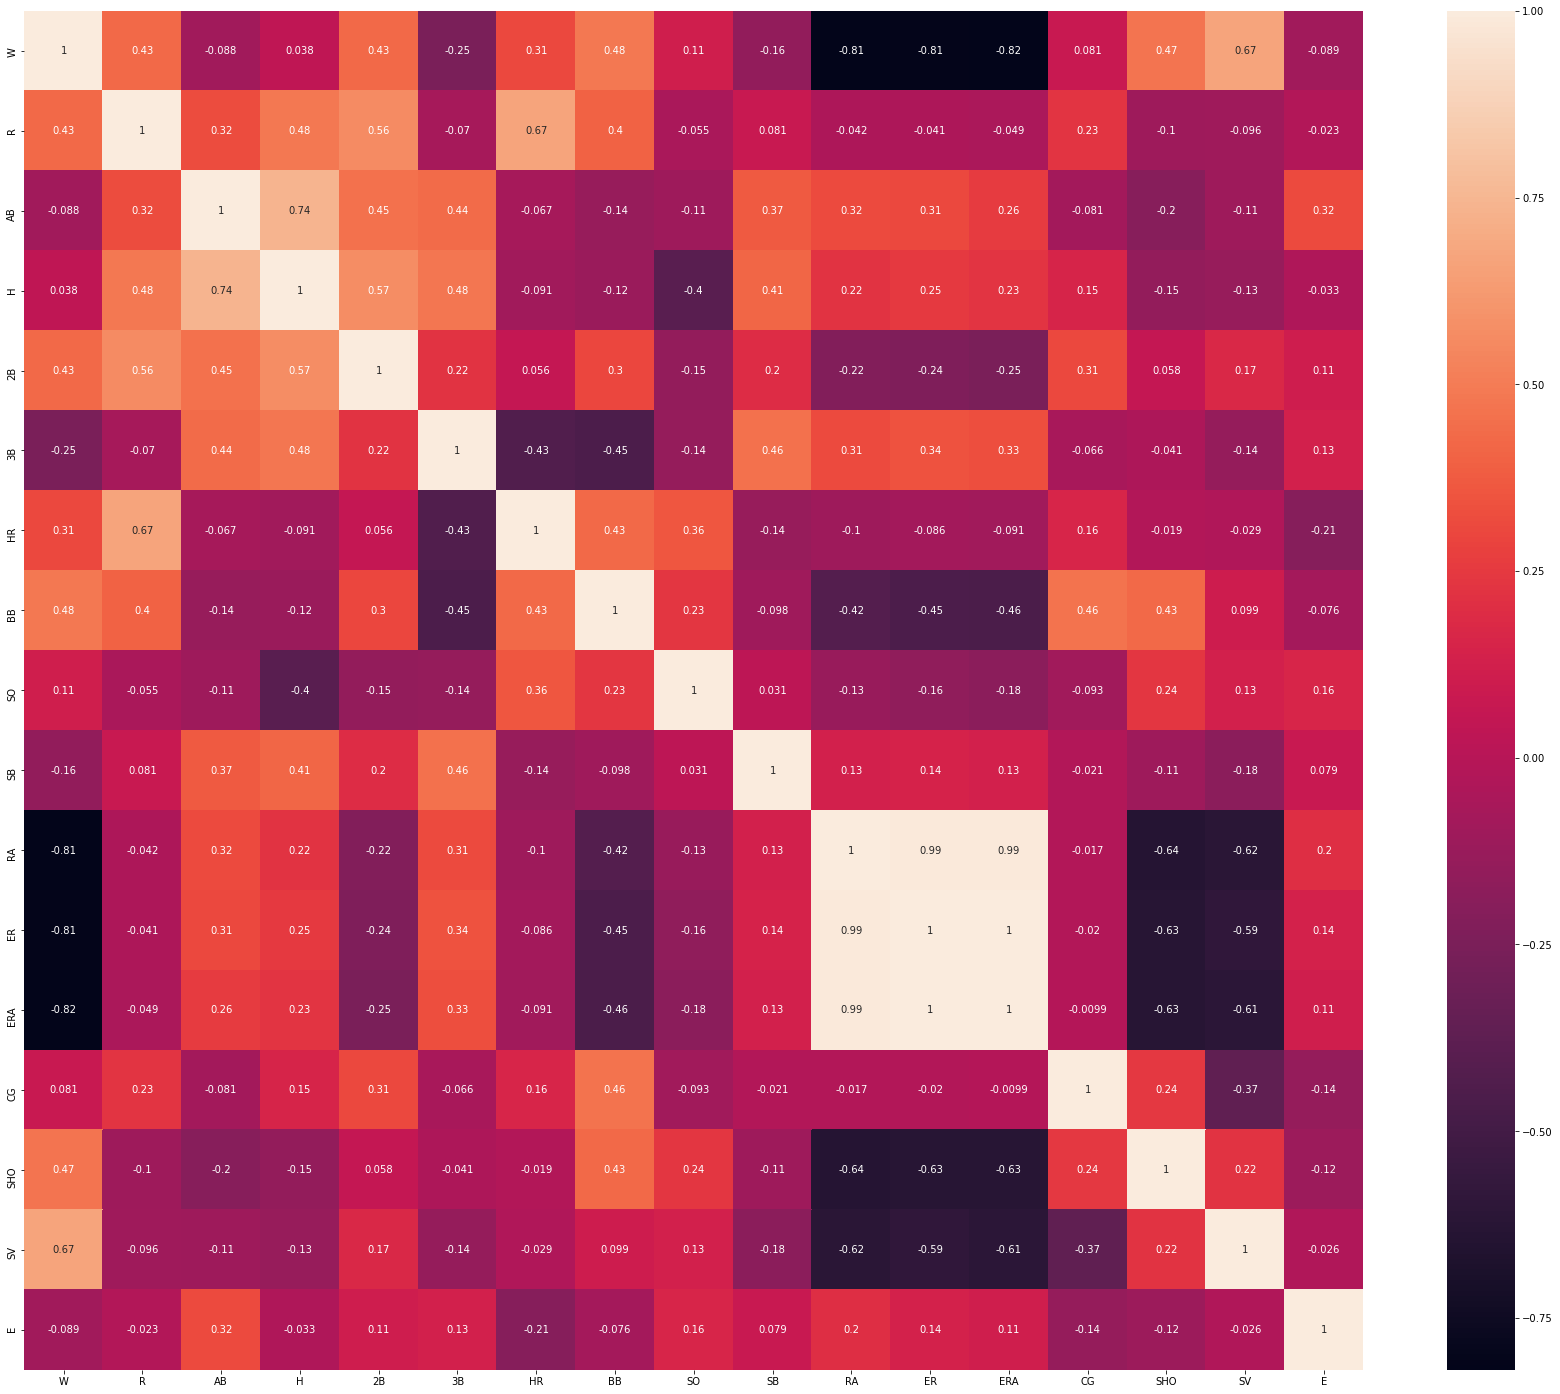

In [52]:
basedata_cor = basedata.corr()
plt.figure(figsize = (30,25))
sns.heatmap(basedata_cor,annot = True)
plt.plot()

In [74]:
basedata.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [76]:
skew = ('R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E')
for col in skew :
    if basedata.skew().loc[col]>0.55:
        basedata[col] = np.log1p(basedata[col])

W          AxesSubplot(0.125,0.71587;0.133621x0.16413)
R       AxesSubplot(0.285345,0.71587;0.133621x0.16413)
AB       AxesSubplot(0.44569,0.71587;0.133621x0.16413)
H       AxesSubplot(0.606034,0.71587;0.133621x0.16413)
2B      AxesSubplot(0.766379,0.71587;0.133621x0.16413)
3B        AxesSubplot(0.125,0.518913;0.133621x0.16413)
HR     AxesSubplot(0.285345,0.518913;0.133621x0.16413)
BB      AxesSubplot(0.44569,0.518913;0.133621x0.16413)
SO     AxesSubplot(0.606034,0.518913;0.133621x0.16413)
SB     AxesSubplot(0.766379,0.518913;0.133621x0.16413)
RA        AxesSubplot(0.125,0.321957;0.133621x0.16413)
ER     AxesSubplot(0.285345,0.321957;0.133621x0.16413)
ERA     AxesSubplot(0.44569,0.321957;0.133621x0.16413)
CG     AxesSubplot(0.606034,0.321957;0.133621x0.16413)
SHO    AxesSubplot(0.766379,0.321957;0.133621x0.16413)
SV           AxesSubplot(0.125,0.125;0.133621x0.16413)
E         AxesSubplot(0.285345,0.125;0.133621x0.16413)
dtype: object

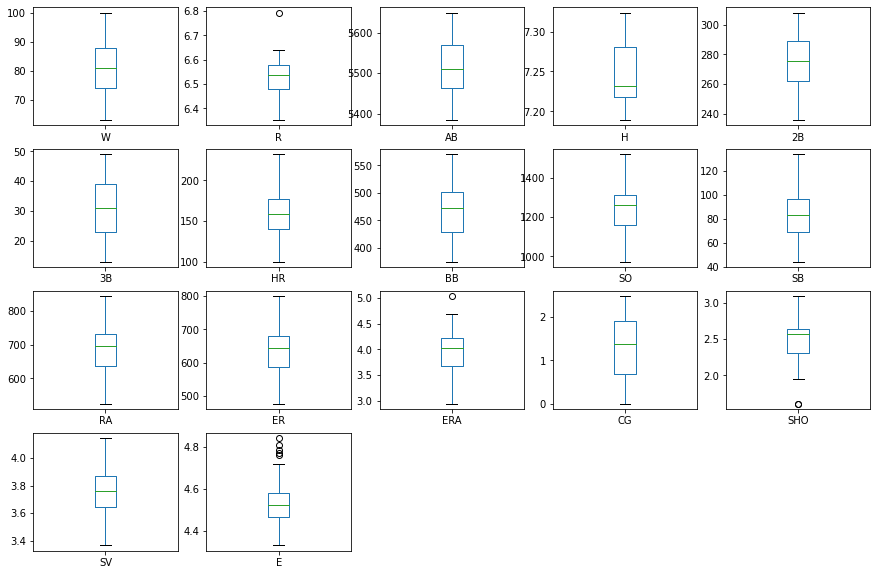

In [77]:
basedata.plot(kind = "box", subplots =  True, layout = (4,5), figsize = (15,10))

In [79]:
X = basedata.drop(['W'], axis=1)
Y = basedata["W"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=50, test_size=0.2)

In [80]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [81]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = [DecisionTreeRegressor(), KNeighborsRegressor(), LinearRegression(), AdaBoostRegressor(), GradientBoostingRegressor()]
max_r2_score = 0
for r_state in range(40,90):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=r_state, test_size=0.33)
    for i in model:
        i.fit(X_train,Y_train)
        pre = i.predict(X_test)
        r2_sc = r2_score(Y_test,pre)
        print("R2 score correspond to random state", r_state, "is",r2_sc)
        if r2_sc > max_r2_score:
            max_r2_score = r2_sc
            final_state = r_state
            final_model = i
            
print()
print()
print() 
print()
print("max R2 score correspond to random state ",final_state, "is", max_r2_score, "and model is", final_model)

R2 score correspond to random state 40 is 0.03791536495313852
R2 score correspond to random state 40 is 0.28111332007952283
R2 score correspond to random state 40 is 0.5835133749774829
R2 score correspond to random state 40 is 0.21352533487123915
R2 score correspond to random state 40 is 0.19350088304792556
R2 score correspond to random state 41 is 0.5518993100310865
R2 score correspond to random state 41 is 0.5613314125407534
R2 score correspond to random state 41 is 0.32729507586853024
R2 score correspond to random state 41 is 0.6524835043044661
R2 score correspond to random state 41 is 0.6461628919450009
R2 score correspond to random state 42 is 0.4130620375640296
R2 score correspond to random state 42 is 0.4246158224245872
R2 score correspond to random state 42 is 0.47725856311162096
R2 score correspond to random state 42 is 0.5940089334918184
R2 score correspond to random state 42 is 0.720334640808751
R2 score correspond to random state 43 is -1.7781217750257996
R2 score correspon

In [87]:
from sklearn.model_selection import cross_val_score

def get_cv_scores(model):
    scores = cross_val_score(model, X_train, Y_train, cv = 5, scoring = 'r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD : ',np.std(scores))
    print('\n')

In [88]:
lr = LinearRegression().fit(X_train, Y_train)

get_cv_scores(lr)

CV Mean:  -20.996908311973666
STD :  23.872365376281994




As we can see the mean score is in negative so we dont think regression will help us for prediction. So we will use classification methods.